In [22]:
# IMPORTING MODULES
import glob
import importlib
import matplotlib.pyplot as plt
import numpy as np
import os
module_path = os.path.abspath(os.path.join('..', 'src'))
sys.path.append(module_path)
import pandas as pd
import random
import scipy.signal as ss
import seaborn as sns
import sys

import tools.data_reader_apd as dr
import tools.display_tools as dt
import tools.preprocessing as preprocessing


import warnings
warnings.filterwarnings(
    "ignore", 
    category=RuntimeWarning
)

In [66]:
# RANKING PHASES BY LOW TO HIGH ANXIETY
SUDS_labels = [
    "Participant",
    "Baseline_SUDS",
    # "BugBox_Relax_SUDS", "BugBox_Preparation_SUDS", "BugBox_Exposure_SUDS", "BugBox_Break_SUDS",
    "BugBox_Relax_SUDS", "BugBox_Preparation_SUDS", "BugBox_Break_SUDS",
    "Speech_Relax_SUDS", "Speech_SUDS", "Speech_Exposure_SUDS", "Speech_Break_SUDS"
]


ha_participant_indices = [
    'P4', 'P6', 'P7', 'P8', 'P10', 'P12', 'P15', 'P16', 'P18', 'P22', 'P26', 'P27', 'P29', 'P31', 'P32', 'P33', 'P35', 'P42', 'P45', 'P47', 'P48', 'P49', 'P54', 'P55', 'P66', 'P69'
]

la_participant_indices = [
    'P14', 'P21', 'P23', 'P25', 'P34', 'P39', 'P43', 'P46', 'P51', 'P57', 'P71', 'P72', 'P77', 'P78', 'P79', 'P80', 'P82', 'P83', 'P84', 'P85', 'P87', 'P88', 'P89', 'P91', 'P92', 'P93'
]

participant_file = os.path.join(dr.Paths.DATA_DIR, "participants_details.csv")
df = pd.read_csv(participant_file)

suds_df = df[SUDS_labels]
ha_suds_df = suds_df.loc[suds_df['Participant'].isin(ha_participant_indices)]
la_suds_df = suds_df.loc[suds_df['Participant'].isin(la_participant_indices)]

ha_ranked = {}
la_ranked = {}

for i in range(ha_suds_df.shape[0]):
    phases_ranked = []
    for j in range(1, ha_suds_df.shape[1]):
        phases_ranked.append(ha_suds_df.iloc[i, j])
    ha_ranked[ha_suds_df.iloc[i, 0]] = phases_ranked

for i in range(la_suds_df.shape[0]):
    phases_ranked = []
    for j in range(1, la_suds_df.shape[1]):
        phases_ranked.append(la_suds_df.iloc[i, j])
    la_ranked[la_suds_df.iloc[i, 0]] = phases_ranked

In [67]:
s = pd.DataFrame([int(subject[1:]) for subject in ha_ranked.keys()])
ha_ranking_df = pd.concat([pd.Series(ha_ranked[subject]) for subject in ha_ranked.keys()], axis=1, ignore_index=True).transpose().reset_index(drop=True)
ha_ranking_df.columns = SUDS_labels[1:]
ha_ranking_df.insert(0, "subject", s)

s = pd.DataFrame([int(subject[1:]) for subject in la_ranked.keys()])
la_ranking_df = pd.concat([pd.Series(la_ranked[subject]) for subject in la_ranked.keys()], axis=1, ignore_index=True).transpose().reset_index(drop=True)
la_ranking_df.columns = SUDS_labels[1:]
la_ranking_df.insert(0, "subject", s)


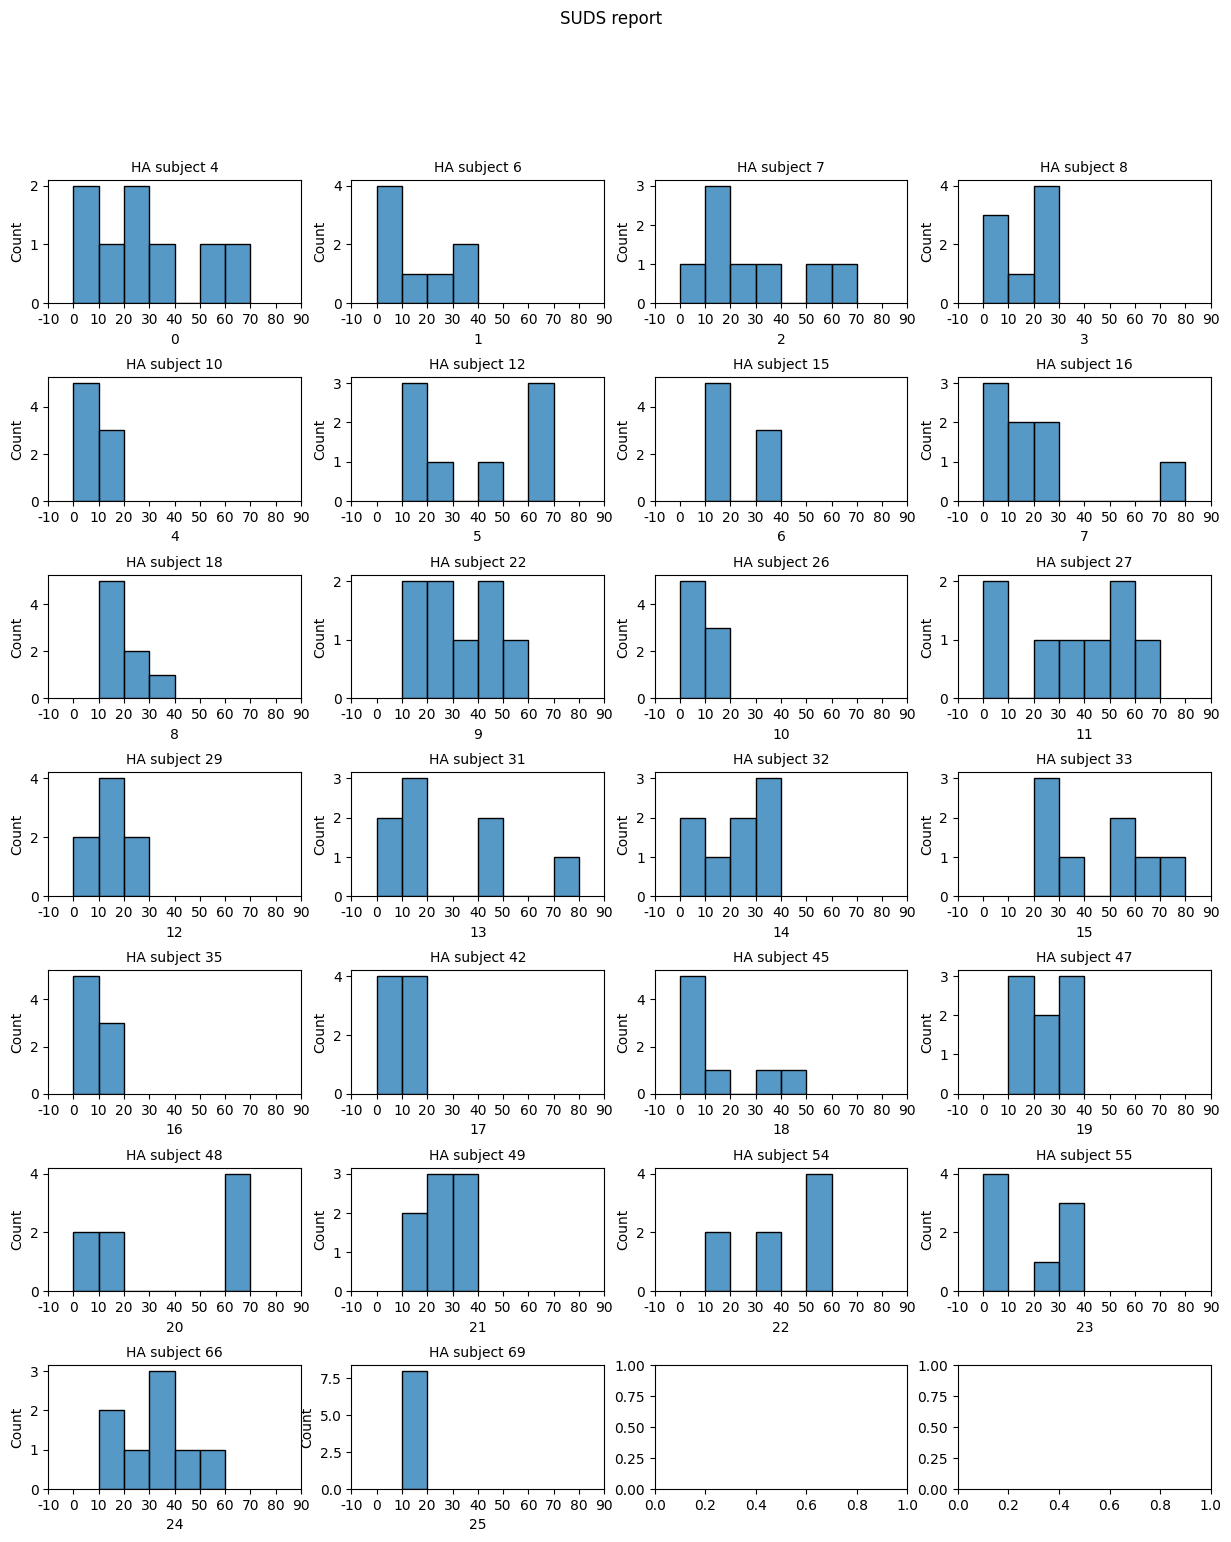

In [70]:
nrows = 7
ncols = 4

figure, axes = plt.subplots(nrows, ncols, sharex=False, figsize=(15, 17))
plt.subplots_adjust(hspace=0.6)
figure.suptitle("SUDS report")
subjects = ha_ranking_df.loc[:, "subject"]
count = 0
for i in range(nrows):
    for j in range(ncols):
        if count < subjects.size:
            s = subjects[count]
            axes[i, j].set_title(f"HA subject {s}", fontsize=10)
            axes[i, j].set_xticks([-10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
            axes[i, j].set_xticklabels([-10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
            axes[i, j].set_xlim([-10, 90])
            sns.histplot(ax=axes[i, j], data=ha_ranking_df.iloc[count, 1:], stat="count", binwidth=10)
            count += 1

<Figure size 640x480 with 0 Axes>

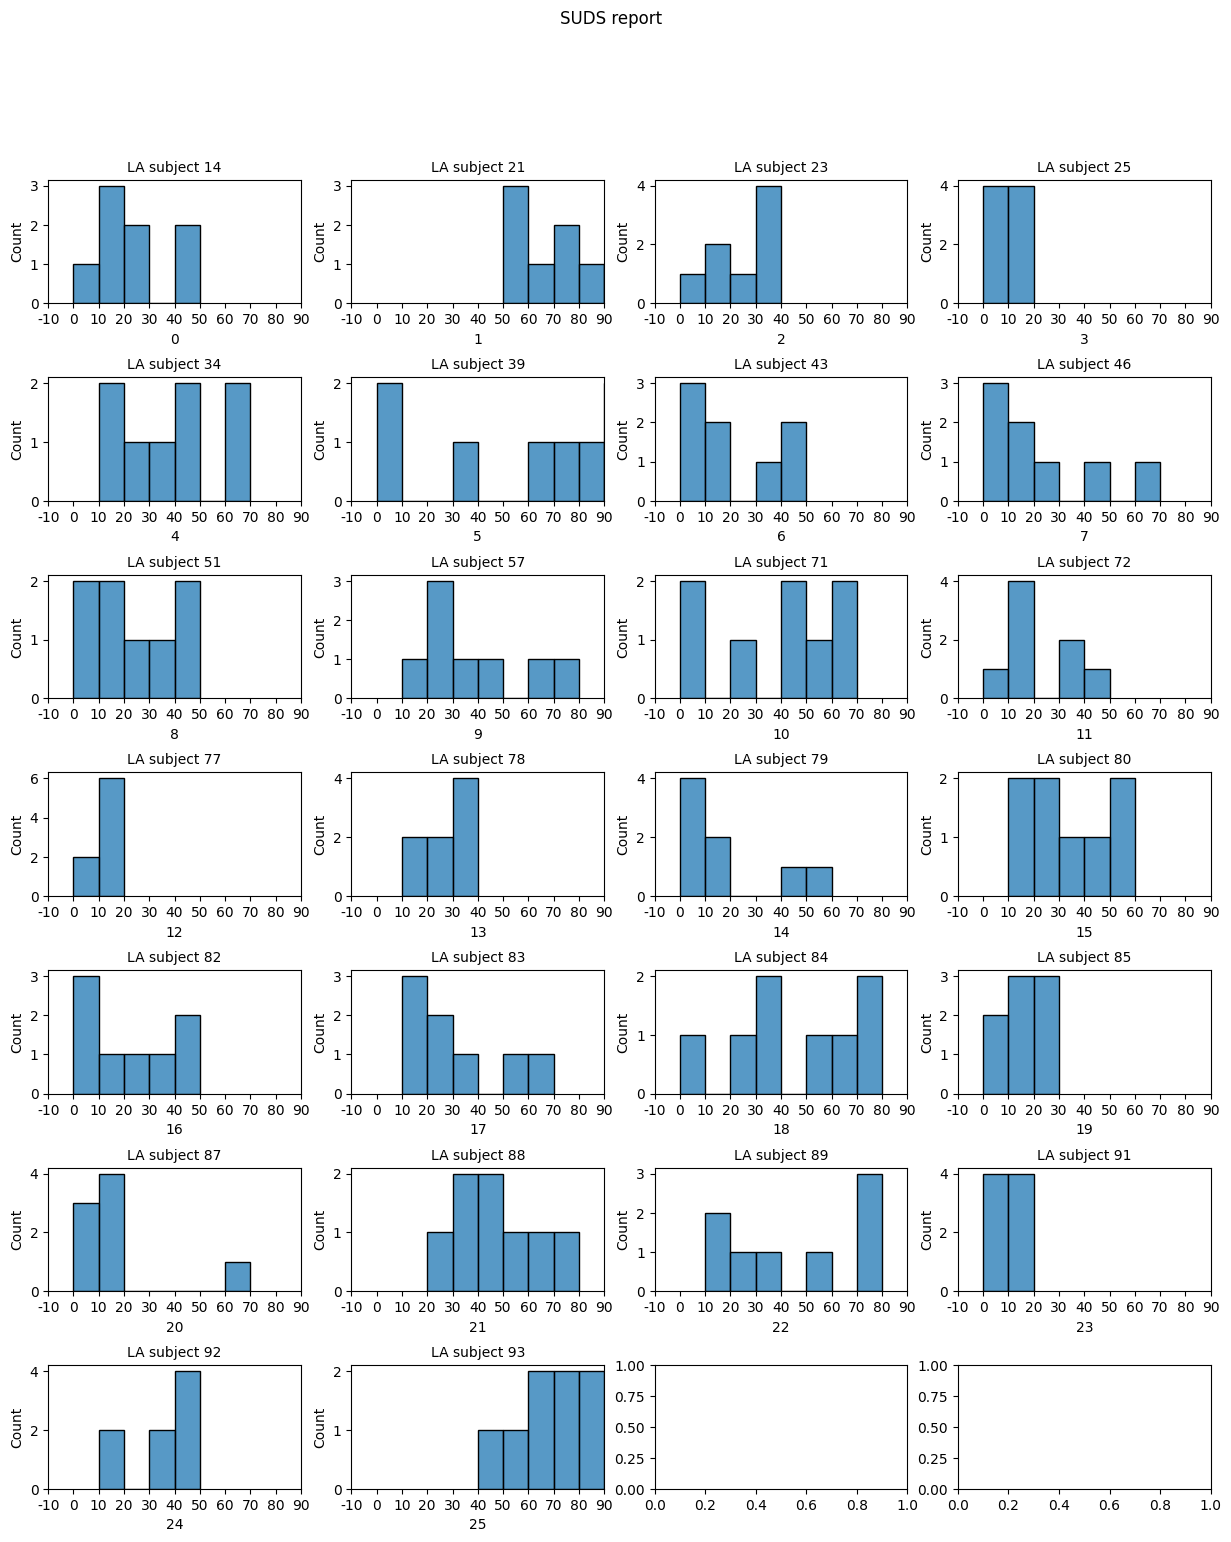

In [71]:
nrows = 7
ncols = 4

plt.figure()
figure, axes = plt.subplots(nrows, ncols, sharex=False, figsize=(15, 17))
plt.subplots_adjust(hspace=0.6)
figure.suptitle("SUDS report")
subjects = la_ranking_df.loc[:, "subject"]
count = 0
for i in range(nrows):
    for j in range(ncols):
        if count < subjects.size:
            s = subjects[count]
            axes[i, j].set_title(f"LA subject {s}", fontsize=10)
            axes[i, j].set_xticks([-10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
            axes[i, j].set_xticklabels([-10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
            axes[i, j].set_xlim([-10, 90])
            sns.histplot(ax=axes[i, j], data=la_ranking_df.iloc[count, 1:], stat="count", binwidth=10)
            count += 1